In [8]:
# Translating matlab code from MIT lecture 
# on this... adding notes as well
# https://www.youtube.com/watch?v=mOFN0VitJ94
using LinearAlgebra
using SparseArrays
using PyPlot

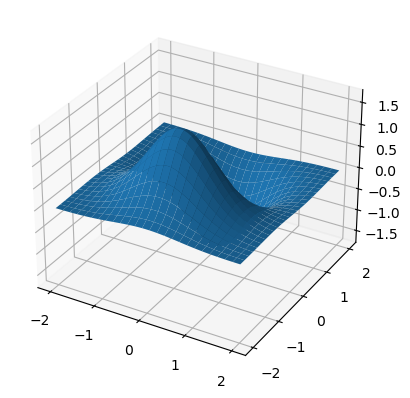

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f60c97110f0>

In [9]:
N = 51
x = range(-2, stop = 2, length = N)
y = x
z = (-x .* exp.(-x .^ 2 .- (y') .^ 2)) .* 4
#scene = surface(x, y, z, linecolor=:black, linewidth=10, levels=15, fillalpha=0.5)
plot_surface(x, y, z)

\begin{pmatrix}
u_{11} \\
u_{12}
\end{pmatrix} \begin{pmatrix}
u_{11} \\
u_{12}
\end{pmatrix} = \begin{pmatrix}
f_{11} \\
f_{12}
\end{pmatrix}

\begin{pmatrix} 0.8944272 & 0.4472136\\ -0.4472136 & -0.8944272 \end{pmatrix} \begin{pmatrix} 10 & 0\\ 0 & 5 \end{pmatrix} 

In [13]:
function poisson_differentiation_matrix(nx, ny)
    # nx - 1 is the number of grid points
    dx = 1 / (nx - 1) # xL - xR
    dy = 1 / (ny - 1)
    D_xy = (-2/dx^2) + (-2/dy^2)
    D_y = 1/dy^2
    D_x = 1/dx^2
    diag_block = spdiagm(
        -1 => repeat([D_y], ny-2),
        0 => repeat([D_xy], ny-1),
        1 => repeat([D_y], ny-2))
    A = kron(SparseMatrixCSC(Matrix(I, size(diag_block))), diag_block)
    A[diagind(A, ny - 1)] .= D_x 
    A[diagind(A, -(ny - 1))] .= D_x
    return A, dx, dy
end

poisson_differentiation_matrix (generic function with 1 method)

In [14]:
nx = 5
ny = 5
A, dx, dy = poisson_differentiation_matrix(nx, ny)
A

16×16 SparseMatrixCSC{Float64, Int64} with 64 stored entries:
⎡⠻⣦⠑⢄⠀⠀⠀⠀⎤
⎢⠑⢄⠻⣦⠑⢄⠀⠀⎥
⎢⠀⠀⠑⢄⠻⣦⠑⢄⎥
⎣⠀⠀⠀⠀⠑⢄⠻⣦⎦

In [15]:
#x = (0+dx):dx:(1-dx)
#y = (0+dy):dy:(1-dy)
x = collect(1:nx - 1)*dx # this seems to include bounds..
y = collect(1:ny - 1)*dy 
f = zeros(size(A, 1))
poisson_f(x,y) = -8*π^2*sin(2*π*x)*sin(2*π*y) - 8*π^2*sin(32*π*x)*sin(32*π*y) 
for (ix, (xi, yi)) in enumerate(
        Iterators.product(x, y))
    f[ix] = poisson_f(xi, yi)
end 
collect(x)

4-element Vector{Float64}:
 0.25
 0.5
 0.75
 1.0

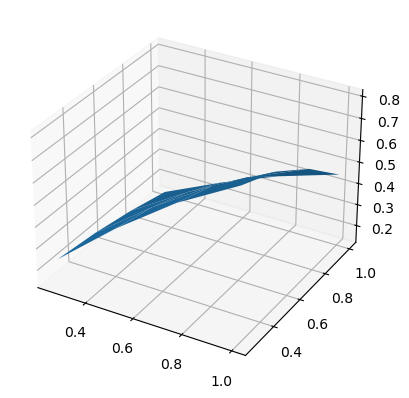

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f609864f8e0>

In [17]:
cfd_f(x, y) = sin(x) * cos(y)
z = cfd_f.(x', y) # x' permutes dims 
plot_surface(x, y, z)

#camera = (210, 30)

# surface(
#     x, y, z;
#     colorbar=false, 
#     xlabel="x",
#     ylabel="y",
#     zlabel="f",
#     xlims=(0, 1),
#     ylims=(0, 1),
#     #camera, 
#     fillalpha=0.7)
# wireframe!(x, y, z)

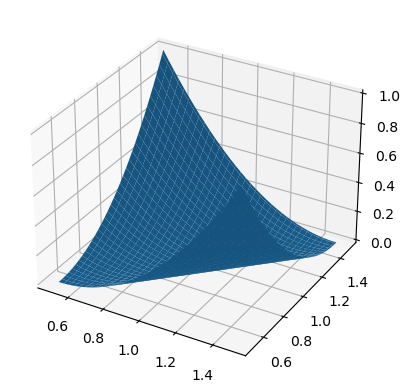

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f60c7797550>

In [11]:
x = 0.5:0.01:1.50 
y = 0.5:0.01:1.50 
f_(x,y) = abs2(x-y) 
plot_surface(x, y, f_.(x', y))
# surf(x,y,f_,plotstyle="pm3d")  
# x2 = 0.5:0.1:1.5
# y2 = 0.5:0.1:1.5
# surf!(x2,y2,f_)

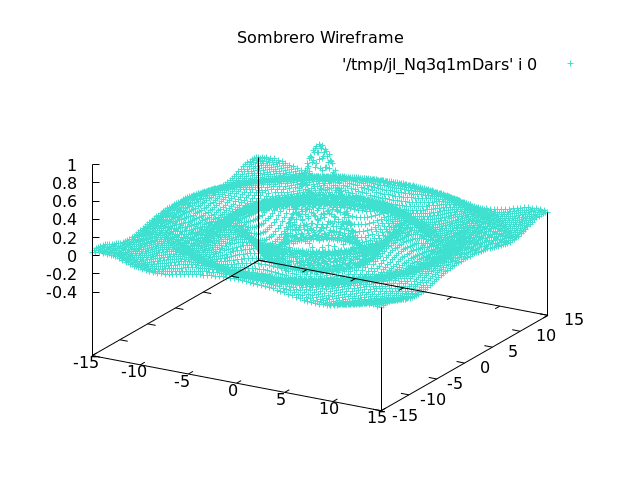

In [7]:
x = y = -15:0.4:15
f1 = (x,y) -> @. sin(sqrt(x*x+y*y))/sqrt(x*x+y*y)
surf(x, y, f1, lc = :turquoise,
     Axes(title    = :Sombrero_Wireframe,
          hidden3d = :on))

In [ ]:
?surface